Importing the Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

1. Data Preprocessing
*   Loading the Dataset:

In [ ]:
big_mart_data = pd.read_csv('/content/drive/MyDrive/archive (5)/Train.csv')

In [ ]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data.shape

(8523, 12)

In [ ]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

<ipython-input-20-8de6f883d7bf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)


In [ ]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [ ]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
sns.set()

Data Visualization

<ipython-input-30-21151ade0b57>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


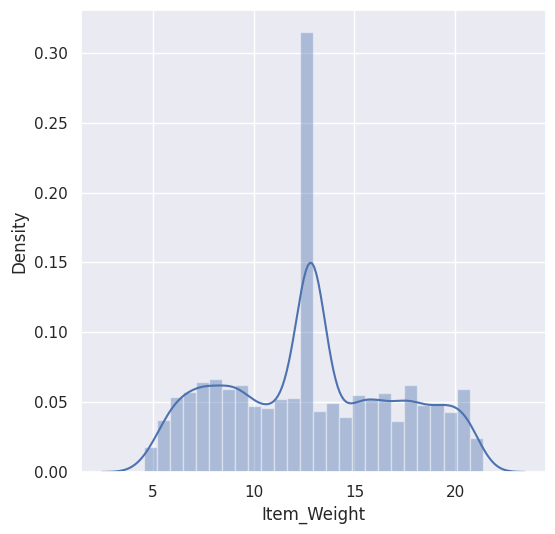

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

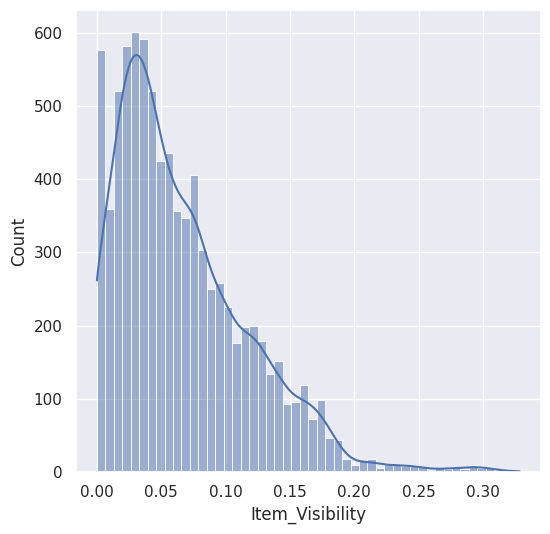

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Visibility'], kde=True)  # kde=True adds the density plot
plt.show()


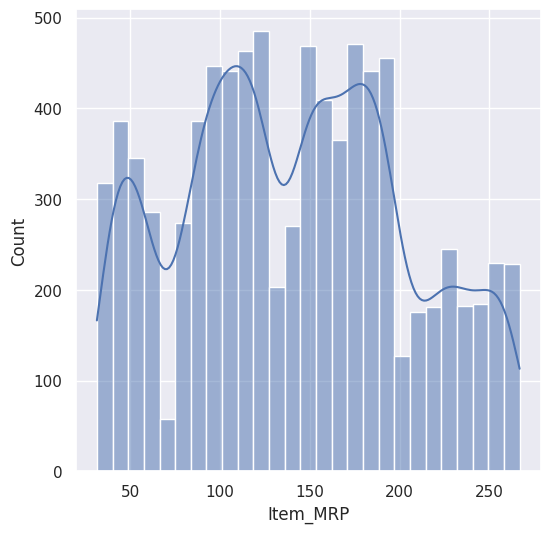

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Item MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_MRP'], kde=True)  # kde=True adds a density curve
plt.show()


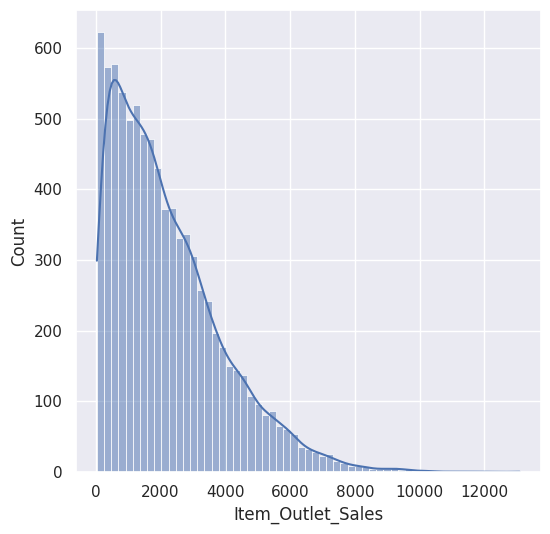

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Item Outlet Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Outlet_Sales'], kde=True)  # kde=True adds a density curve
plt.show()


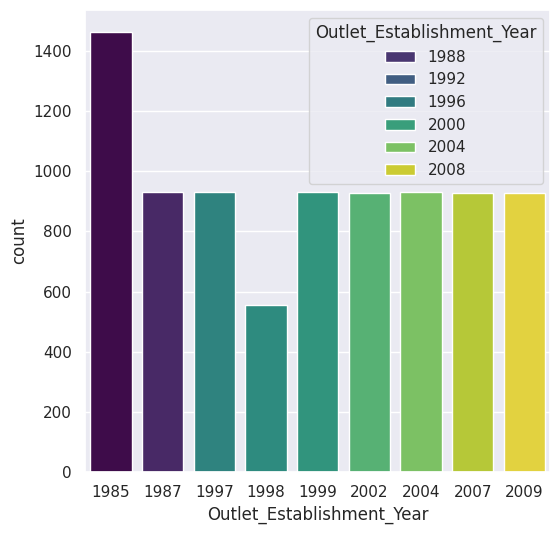

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlet Establishment Year distribution with colors
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data, hue='Outlet_Establishment_Year', palette='viridis')
plt.show()



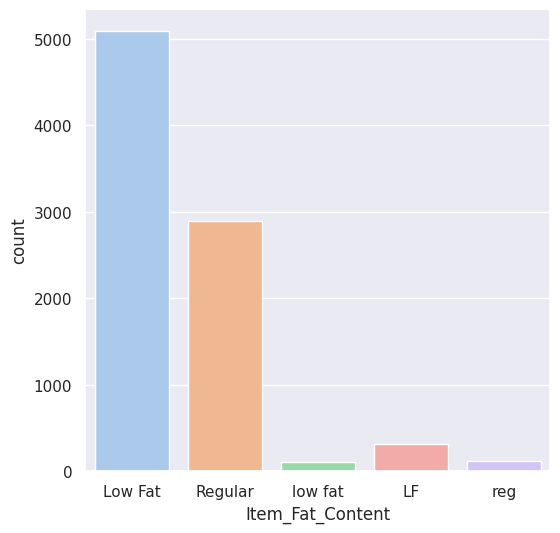

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Item Fat Content distribution with colors
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data,hue='Item_Fat_Content', palette='pastel')  # Try 'viridis', 'coolwarm', 'Set2', etc.
plt.show()


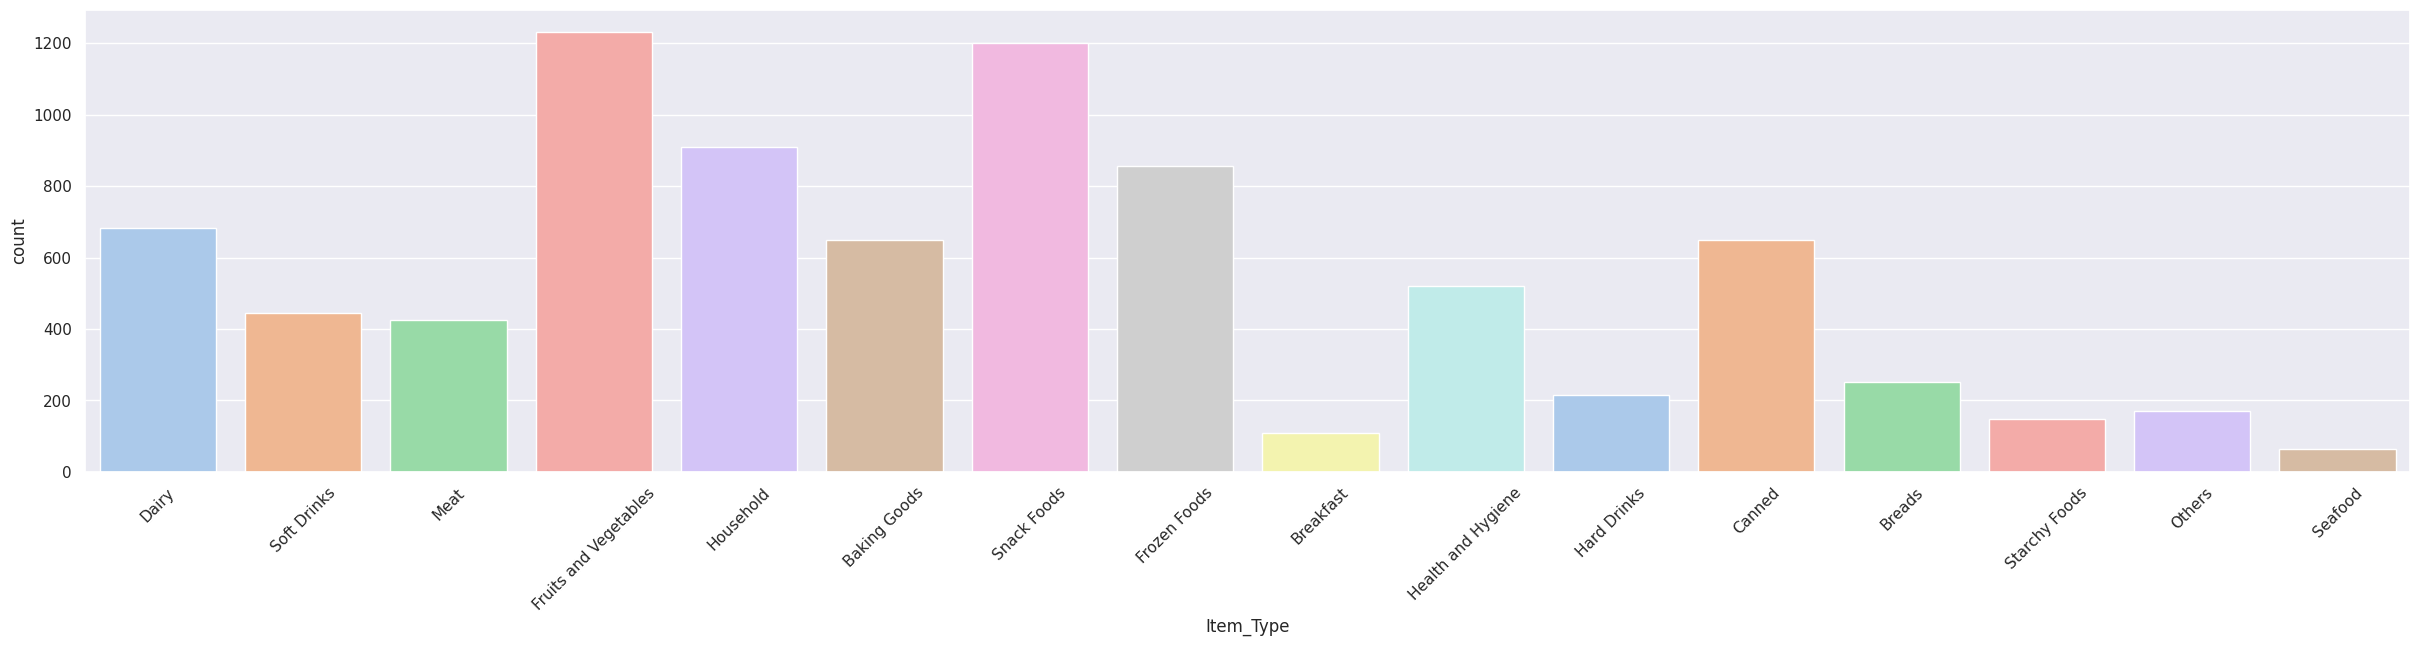

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Item Type distribution with colors
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data, hue='Item_Type', palette='pastel')  # Changed 'Item_type' to 'Item_Type'
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

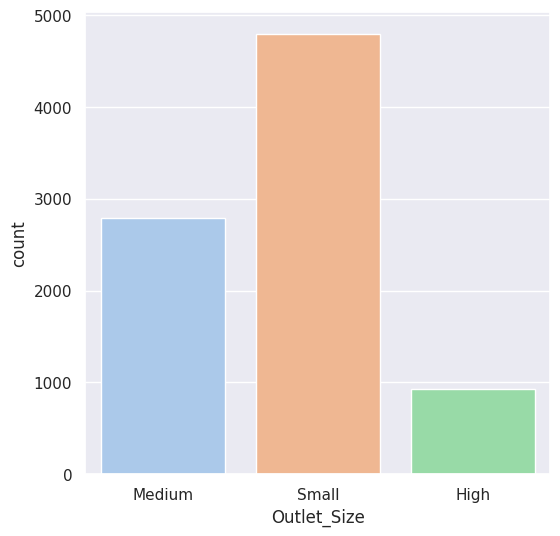

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlet Size distribution with pastel colors
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data, hue='Outlet_Size', palette='pastel', legend=False)
plt.show()


In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


4. Training the Model (XGBoost)

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Testing the Model

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

Evaluation of the Model

In [ ]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/archive (5)/Train.csv")  # If downloaded multiple times, check the correct filename

# Fill missing values for numerical columns only
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Feature Selection (Make sure these columns exist in your dataset)
features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Type"]
df = df[features + ["Item_Outlet_Sales"]]

# Encoding categorical values
df["Outlet_Size"] = df["Outlet_Size"].astype("category").cat.codes
df["Outlet_Type"] = df["Outlet_Type"].astype("category").cat.codes

# Splitting data
X = df.drop("Item_Outlet_Sales", axis=1)
y = df["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "Train.pkl")

print("✅ Model trained and saved as 'Train.pkl'")


✅ Model trained and saved as 'Train.pkl'


Downloading the trained file

In [ ]:
from google.colab import files
files.download('Train.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

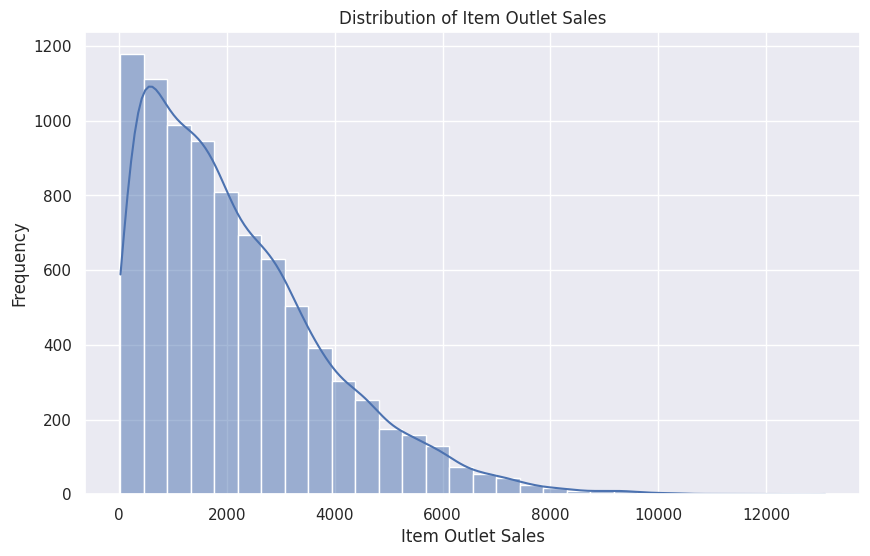

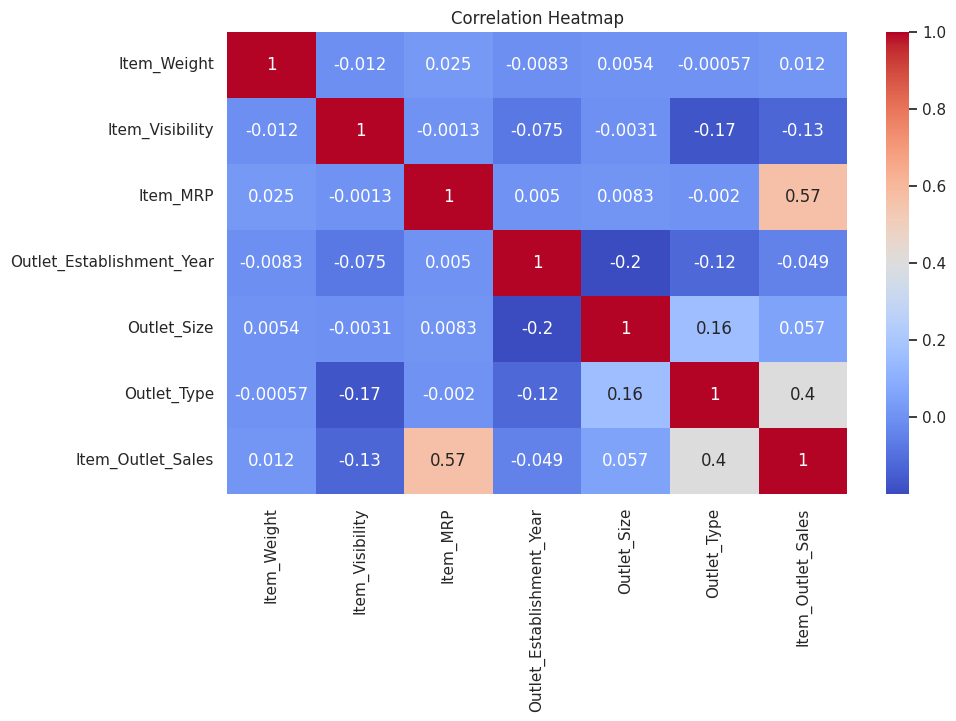

In [ ]:
# Data Exploration and Visualization
import matplotlib.pyplot as plt  # Make sure you have imported matplotlib
import seaborn as sns  # Make sure you have imported seaborn
import numpy as np  # Make sure you have imported numpy


plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)  # Changed 'data' to 'df'
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')  # Changed 'data' to 'df'
plt.title('Correlation Heatmap')
plt.show()

# Assuming xgb_test_pred and rf_test_pred will be calculated later in your code
# plt.figure(figsize=(12, 6))
# plt.scatter(y_test, xgb_test_pred, alpha=0.5, label='XGBoost', color='blue')
# plt.scatter(y_test, rf_test_pred, alpha=0.5, label='Random Forest', color='green')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.title('Predicted vs Actual Sales (Test Set)')
# plt.xlabel('Actual Sales')
# plt.ylabel('Predicted Sales')
# plt.legend()
# plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# XGBoost
xgb = XGBRegressor()
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='r2')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 200}


In [ ]:
# Testing
xgb_train_pred = best_xgb.predict(X_train)
xgb_test_pred = best_xgb.predict(X_test)
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, dataset_type, model_name):
    r2 = metrics.r2_score(y_true, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    print(f"{model_name} - {dataset_type} R²: {r2:.4f}, RMSE: {rmse:.2f}")

print("\nModel Evaluation:")
evaluate_model(y_train, xgb_train_pred, "Train", "XGBoost")
evaluate_model(y_test, xgb_test_pred, "Test", "XGBoost")
evaluate_model(y_train, rf_train_pred, "Train", "Random Forest")
evaluate_model(y_test, rf_test_pred, "Test", "Random Forest")


Model Evaluation:
XGBoost - Train R²: 0.6240, RMSE: 1054.61
XGBoost - Test R²: 0.6098, RMSE: 1029.89
Random Forest - Train R²: 0.7141, RMSE: 919.67
Random Forest - Test R²: 0.6001, RMSE: 1042.61


In [1]:
# Importing Dependencies (Updated for Classification)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
from google.colab import drive
import os

# Mount Google Drive only if not already mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Drive already mounted.")

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/archive (5)/Train.csv')

# Data Preprocessing
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

le = LabelEncoder()
categorical_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data = pd.get_dummies(data, columns=['Item_Type'], drop_first=True)

features = [col for col in data.columns if col not in ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
X = data[features]
y = data['Item_Outlet_Sales']

# Convert to Binary Classification
median_sales = y.median()
y_binary = (y > median_sales).astype(int)  # 1 = High sales, 0 = Low sales

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Model Training with Tuning
# XGBoost Classifier
xgb_clf = XGBClassifier(eval_metric='logloss')
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
xgb_grid = GridSearchCV(xgb_clf, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb_clf = xgb_grid.best_estimator_
print("Best XGBoost Classifier Parameters:", xgb_grid.best_params_)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf_clf = rf_grid.best_estimator_
print("Best Random Forest Classifier Parameters:", rf_grid.best_params_)

# Testing
xgb_train_pred = best_xgb_clf.predict(X_train)
xgb_test_pred = best_xgb_clf.predict(X_test)
rf_train_pred = best_rf_clf.predict(X_train)
rf_test_pred = best_rf_clf.predict(X_test)

# Evaluation Function for Classification
def evaluate_classification_model(y_true, y_pred, dataset_type, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} - {dataset_type}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(classification_report(y_true, y_pred, target_names=['Low Sales', 'High Sales']))
    print()

# Evaluate Both Models
print("Classification Model Performance:")
evaluate_classification_model(y_train, xgb_train_pred, "Train", "XGBoost Classifier")
evaluate_classification_model(y_test, xgb_test_pred, "Test", "XGBoost Classifier")
evaluate_classification_model(y_train, rf_train_pred, "Train", "Random Forest Classifier")
evaluate_classification_model(y_test, rf_test_pred, "Test", "Random Forest Classifier")

# Save Models
joblib.dump(best_xgb_clf, '/content/xgboost_classifier.pkl')
joblib.dump(best_rf_clf, '/content/random_forest_classifier.pkl')
print("Models saved as 'xgboost_classifier.pkl' and 'random_forest_classifier.pkl'")

# Download Models
from google.colab import files
files.download('/content/xgboost_classifier.pkl')
files.download('/content/random_forest_classifier.pkl')

Drive already mounted.
Best XGBoost Classifier Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Random Forest Classifier Parameters: {'max_depth': 10, 'n_estimators': 200}
Classification Model Performance:
XGBoost Classifier - Train:
  Accuracy: 0.8237
  Precision: 0.7823
  Recall: 0.8992
  F1-Score: 0.8367
              precision    recall  f1-score   support

   Low Sales       0.88      0.75      0.81      3394
  High Sales       0.78      0.90      0.84      3424

    accuracy                           0.82      6818
   macro avg       0.83      0.82      0.82      6818
weighted avg       0.83      0.82      0.82      6818


XGBoost Classifier - Test:
  Accuracy: 0.8100
  Precision: 0.7667
  Recall: 0.8789
  F1-Score: 0.8190
              precision    recall  f1-score   support

   Low Sales       0.87      0.74      0.80       871
  High Sales       0.77      0.88      0.82       834

    accuracy                           0.81      1705
   macro avg  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>